In [2]:
# For computations
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import matplotlib

# Importing the datasets for later on 
from sklearn import datasets

# Preprocessing functionalities, e.g. for standardization
from sklearn import preprocessing

# Setting the plot to standard parameters
matplotlib.rcdefaults()
# Formatting the size of future plots
plt.rcParams["figure.figsize"] = (4,3)
# Imports different color maps for plots
import matplotlib.cm as cm

# Loading the customer data
# To read the file and to specify the delimiter parameter we do the following

wine_data_labels = ["Class Identifier", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
                                                      "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

wine_cluster = pd.read_csv('wine.data', delimiter=",", names=wine_data_labels)
# Performing clustering
from sklearn.cluster import KMeans

# Package containing evaluation metrics
import sklearn.metrics as sm

In [3]:
wine_cluster.head()

,Class Identifier,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_cluster.describe()

,Class Identifier,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [24]:
wine_cluster_class = wine_cluster[wine_cluster.columns[0]]
wine_cluster_class = wine_cluster_class.astype(np.int64, copy=False)

wine_data = wine_cluster[wine_cluster.columns[1:14]]
wine_std = pd.DataFrame(preprocessing.StandardScaler().fit_transform(wine_data))
wine_std.columns = wine_data.columns


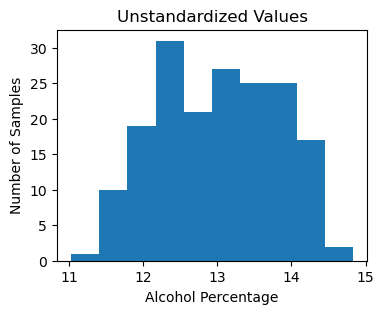

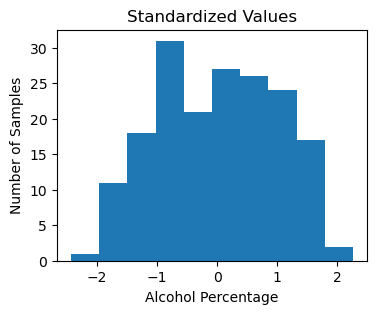

In [26]:
plt.clf()
plt.hist(wine_data["Alcohol"])
plt.title("Unstandardized Values")
plt.xlabel("Alcohol Percentage")
plt.ylabel("Number of Samples")
plt.show()

plt.hist(wine_std["Alcohol"])
plt.title("Standardized Values")
plt.xlabel("Alcohol Percentage")
plt.ylabel("Number of Samples")
plt.show()



c:\Users\REL1PLY\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\REL1PLY\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\REL1PLY\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\REL1PLY\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

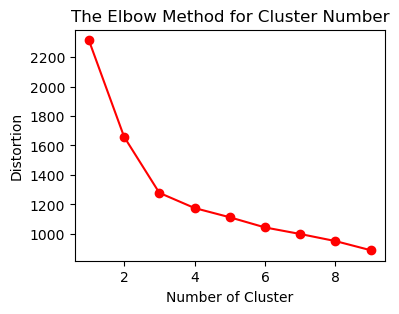

In [28]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(wine_std)
    distortions.append(kmeanModel.inertia_)
plt.rcParams["figure.figsize"] = (4,3)
plt.plot(K, distortions, 'ro-')
plt.xlabel("Number of Cluster")
plt.ylabel("Distortion")
plt.title("The Elbow Method for Cluster Number")
plt.show()

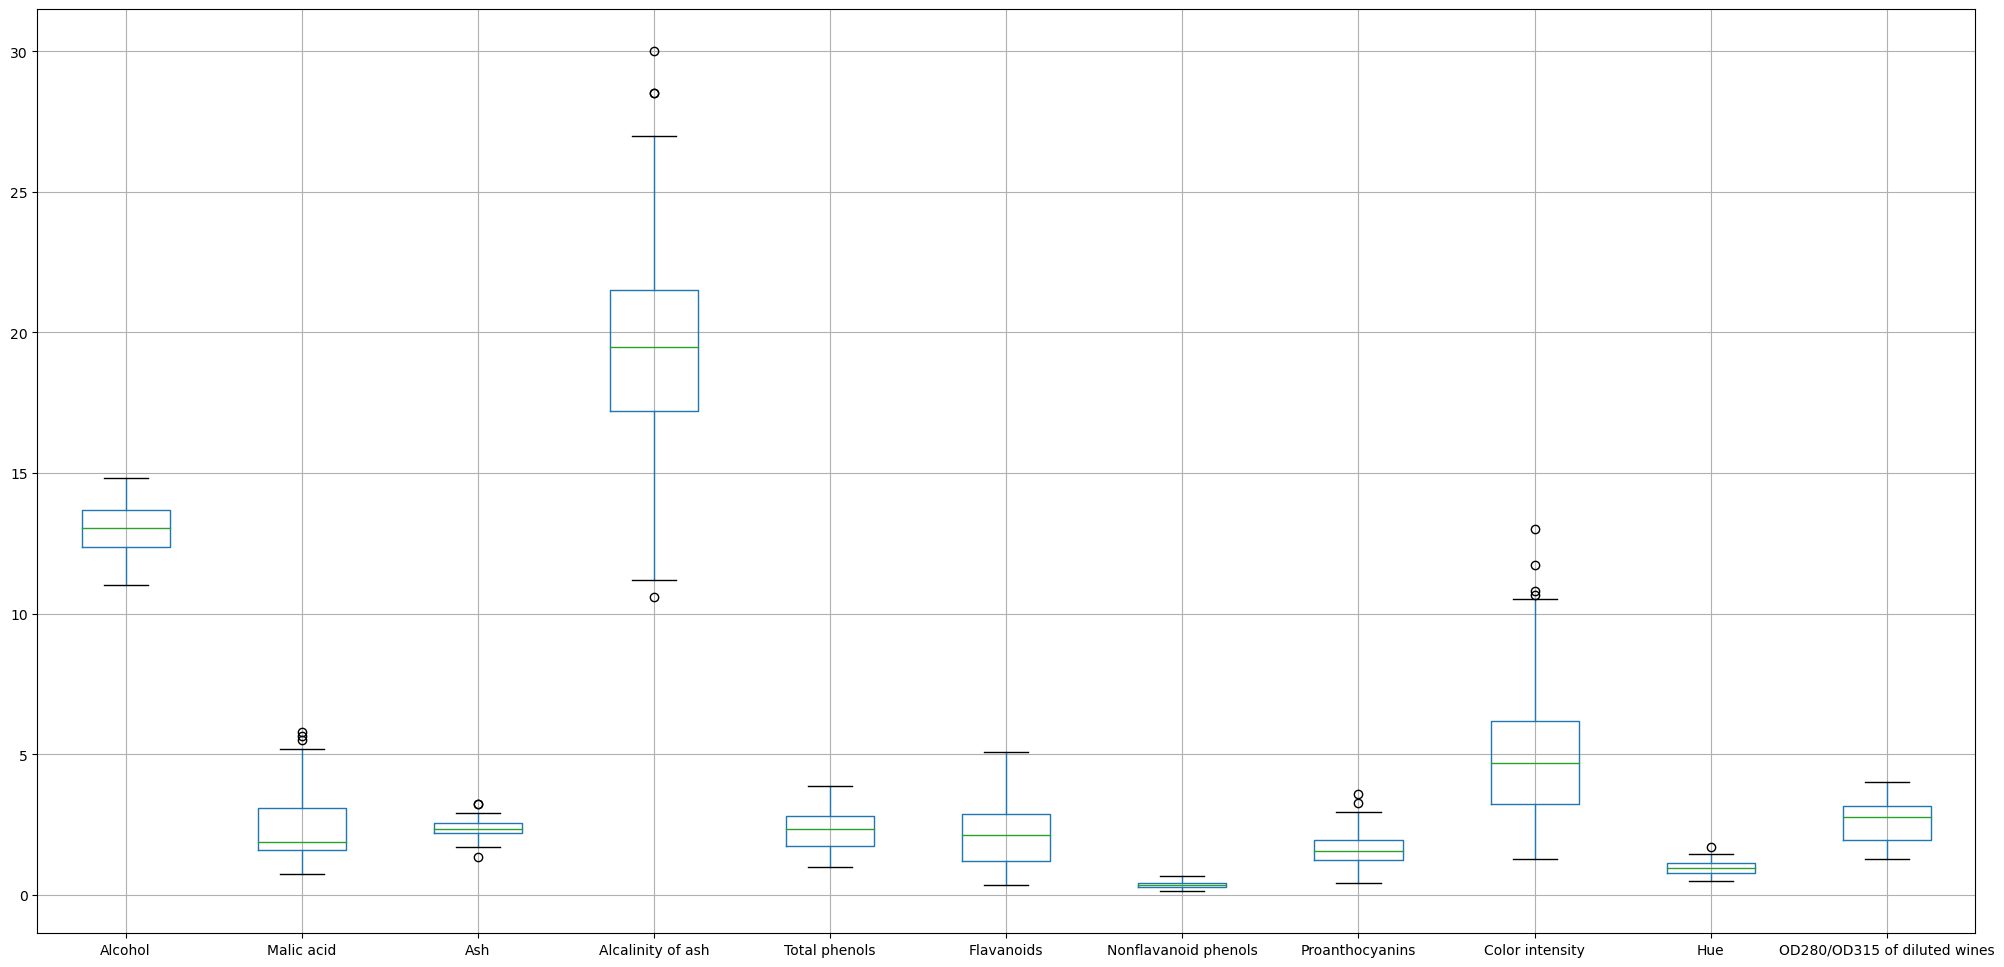

In [38]:
wine_data_2 = wine_data.drop(columns=["Proline", "Magnesium"])
plt.rcParams["figure.figsize"] = (25,12)
boxplot = wine_data.boxplot(column=wine_data_2.columns.tolist())
plt.show()

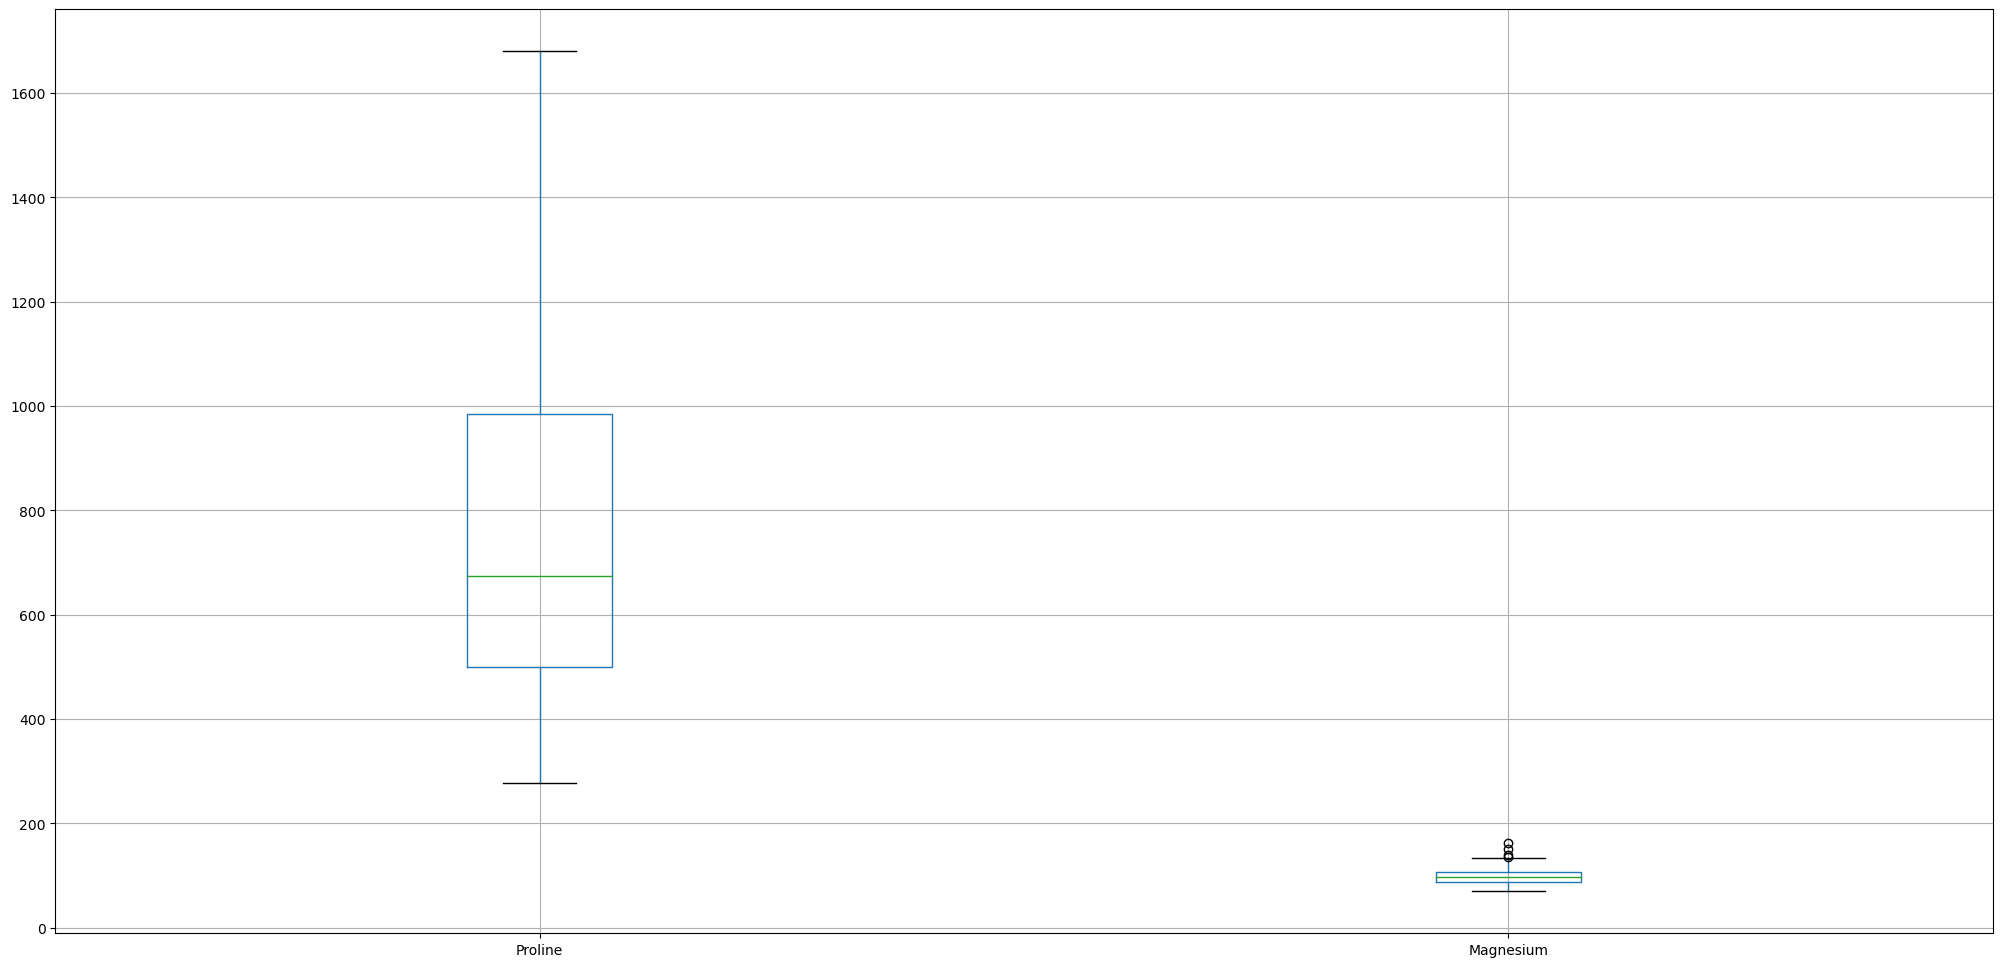

In [41]:
plt.rcParams["figure.figsize"] = (25,12)
boxplot = wine_data.boxplot(column=["Proline", "Magnesium"])
plt.show()

c:\Users\REL1PLY\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\REL1PLY\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Coordinates of the centroids: 
 [[ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.93900326 -0.39196582 -0.43920097  0.20898793 -0.46377382 -0.05334831
   0.06690377 -0.01982215  0.06479192 -0.88207529  0.45298189  0.28973833
  -0.75602559]
 [ 0.87809728 -0.30457633  0.31894179 -0.66452366  0.56488825  0.87650546
   0.94363903 -0.58558981  0.58178294  0.16718842  0.48372814  0.76705349
   1.15834713]]
Column names: 
 Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


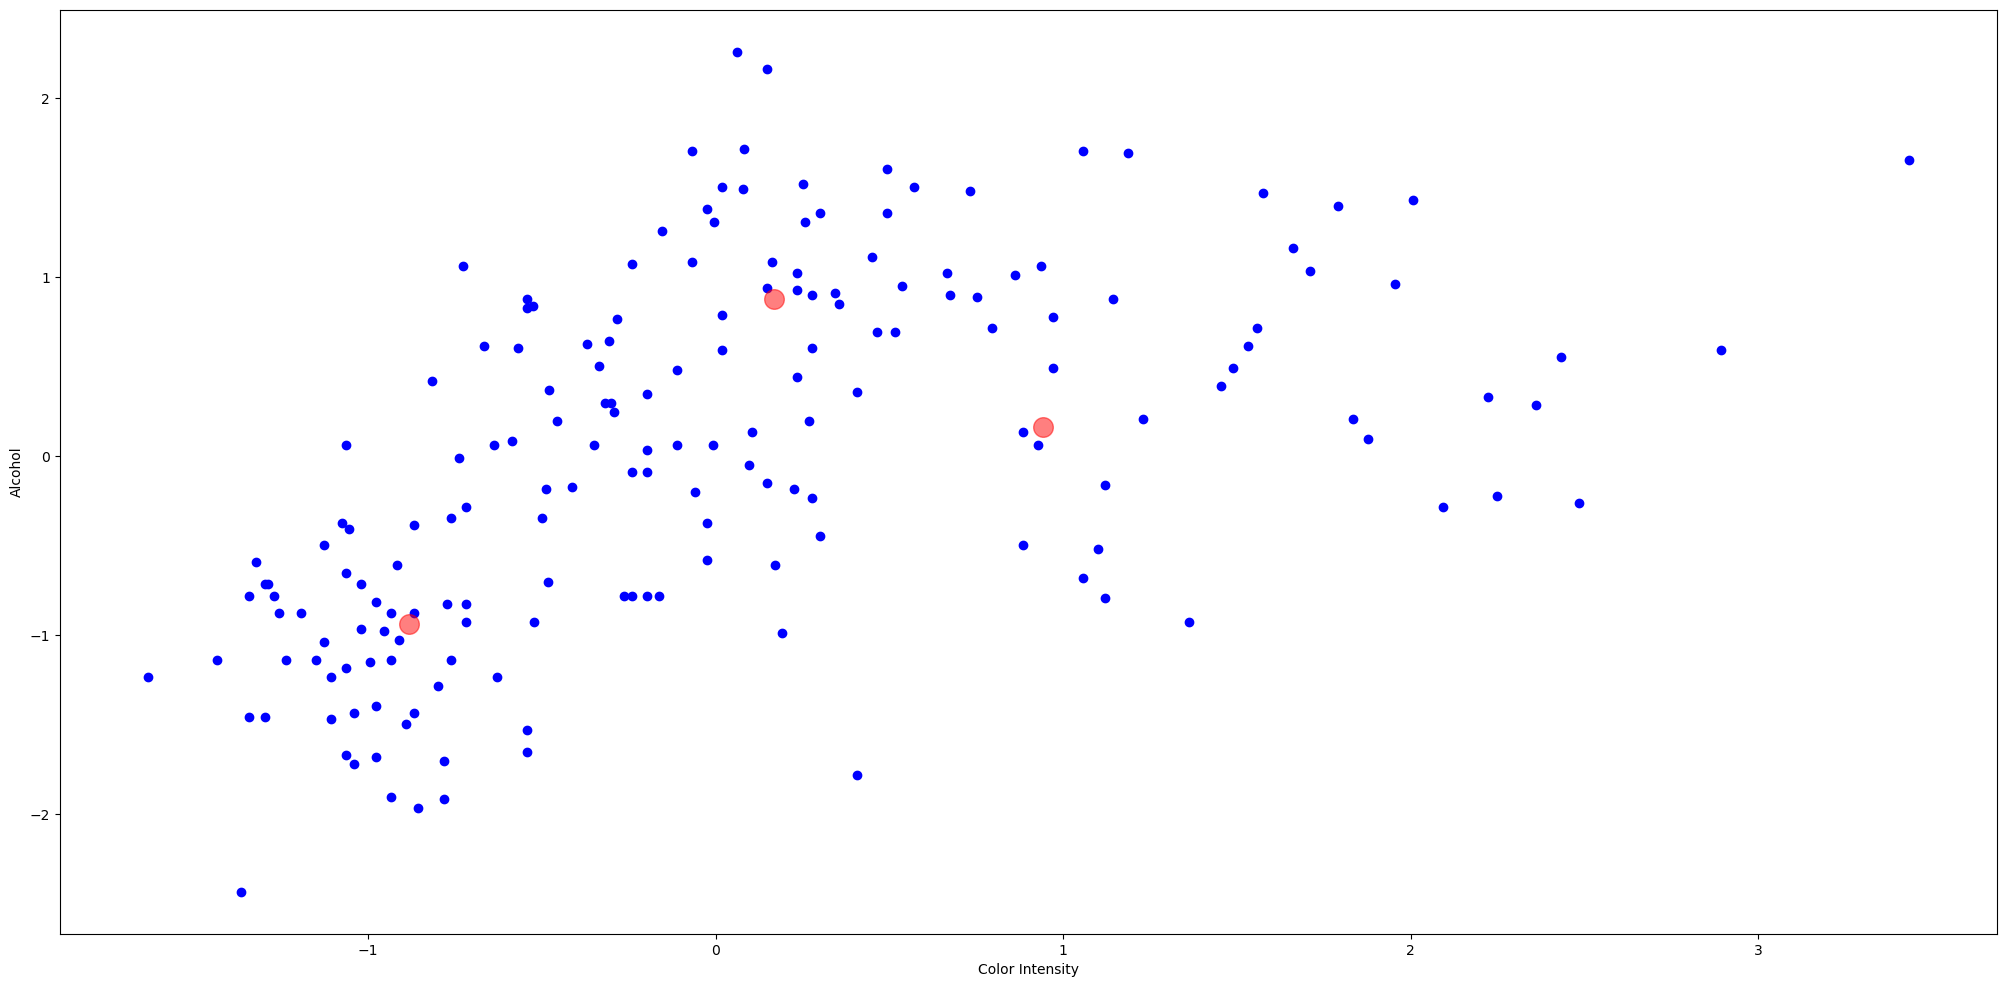

In [47]:
ThreeClusterModel = KMeans(n_clusters = 3, random_state = 0)
ThreeClusterModel.fit(wine_std)

print("Coordinates of the centroids: \n", ThreeClusterModel.cluster_centers_)

print("Column names: \n", wine_std.columns)

plt.scatter(wine_std["Color intensity"], wine_std["Alcohol"], c="blue")

ThreeClusterModelCenters = ThreeClusterModel.cluster_centers_
plt.scatter(ThreeClusterModelCenters[:,9], ThreeClusterModelCenters[:,0], c="red", s=200, alpha=0.5)
plt.xlabel("Color Intensity")
plt.ylabel("Alcohol")
plt.show()

In [48]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(wine_std)
gmm.get_params()

c:\Users\REL1PLY\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 3,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [53]:
print('Means: \n', gmm.means_)

print('Weights: \n', gmm.weights_)

print('AIC: ', gmm.aic(wine_std))
print('BIC: ', gmm.bic(wine_std))

predicted_classes = gmm.predict(wine_std)
print('Predicted Classes: ', predicted_classes)

sm.confusion_matrix(wine_cluster[['Class Identifier']], predicted_classes + 1)

Means: 
 [[ 0.81535193 -0.33244352  0.2448001  -0.67576135  0.63685313  0.82213961
   0.89675273 -0.59782121  0.61971204  0.13188764  0.50056412  0.74602428
   1.11395195]
 [-0.94194964 -0.36665974 -0.39337021  0.25121283 -0.57289459 -0.03349368
   0.08136144  0.01323491  0.00779434 -0.88476972  0.43434413  0.29281555
  -0.78131234]
 [ 0.16516987  0.87143373  0.18784666  0.52521419 -0.07462282 -0.97928753
  -1.21559036  0.72599751 -0.77948503  0.94259045 -1.16489416 -1.29279595
  -0.4065956 ]]
Weights: 
 [0.35563555 0.3580442  0.28632025]
AIC:  4807.205086385826
BIC:  5806.2851211775405
Predicted Classes:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


array([[59,  0,  0],
       [ 4, 64,  3],
       [ 0,  0, 48]], dtype=int64)

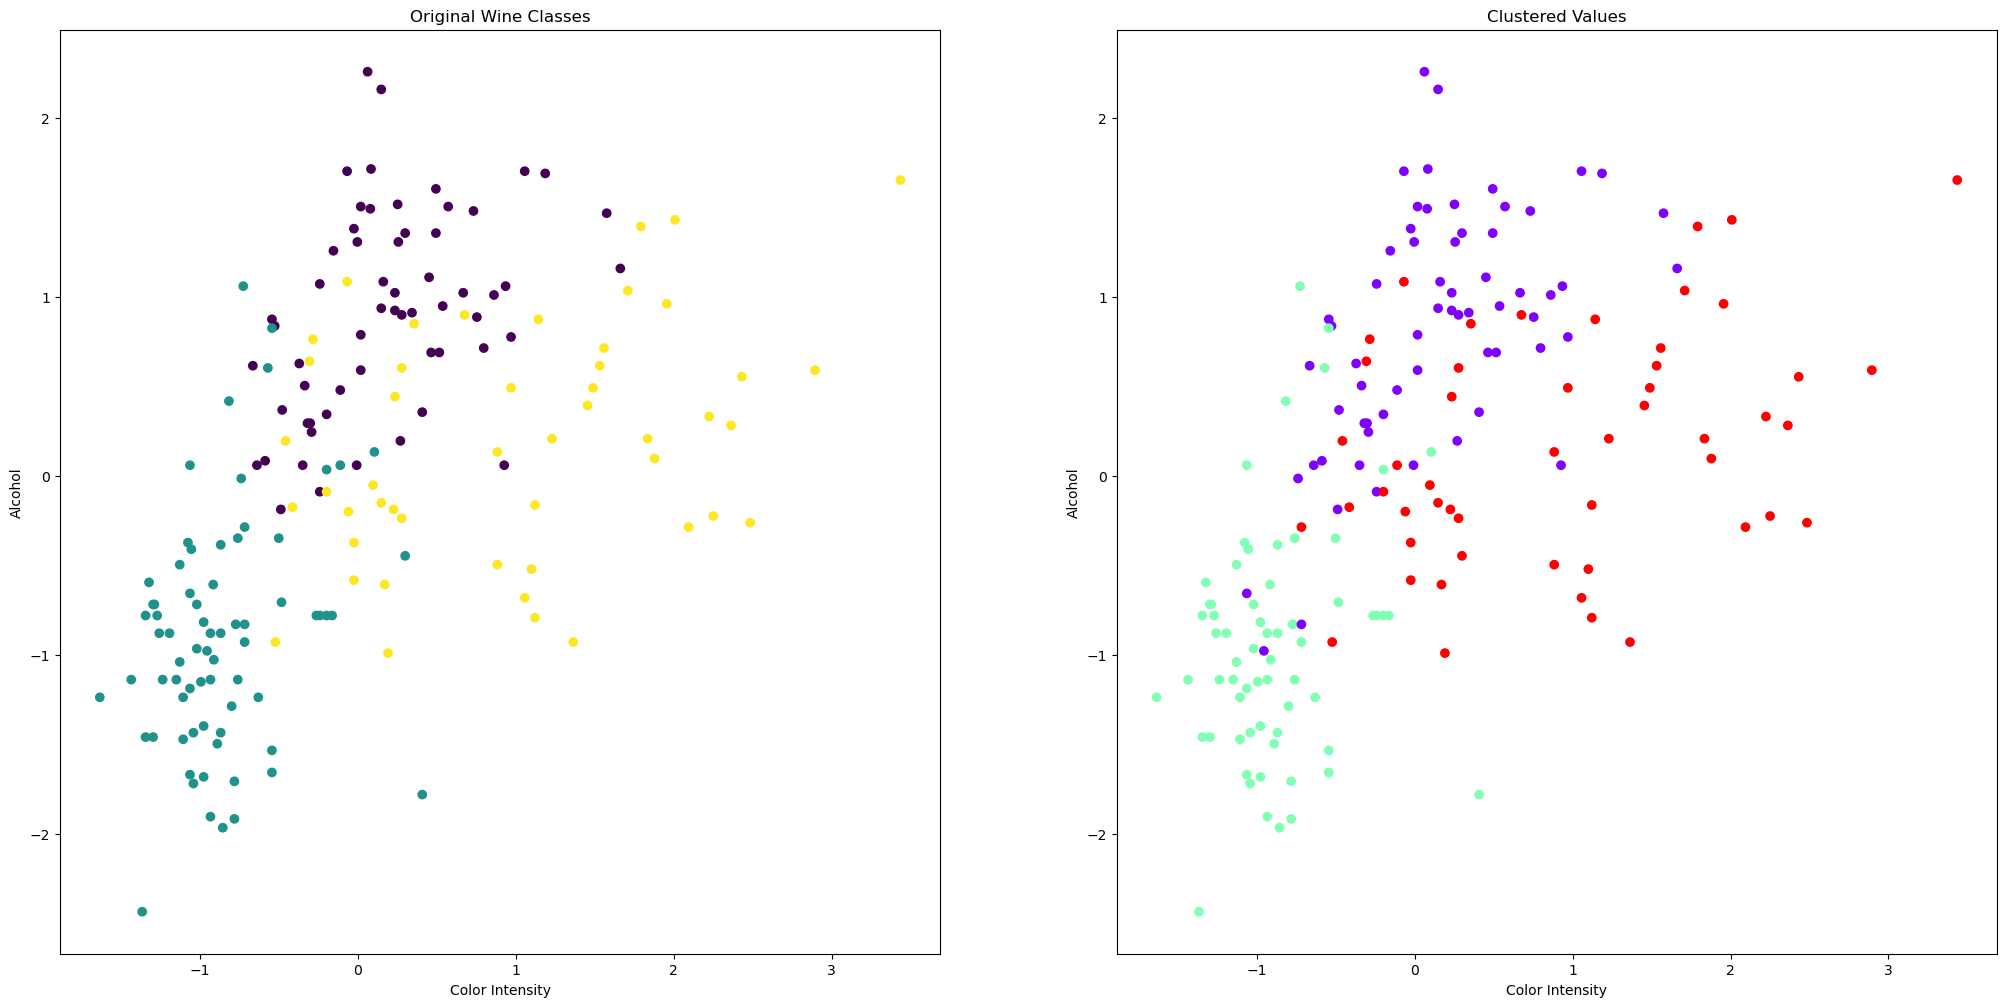

In [54]:
plt.clf()
plt.rcParams["figure.figsize"] = (9,3)
plt.subplot(121)
plt.scatter(wine_std['Color intensity'], wine_std["Alcohol"], c=wine_cluster_class.values.ravel())
plt.xlabel("Color Intensity")
plt.ylabel("Alcohol")
plt.title('Original Wine Classes')
plt.subplot(122)
plt.scatter(wine_std["Color intensity"], wine_std['Alcohol'], c=predicted_classes, cmap=cm.rainbow)
plt.xlabel("Color Intensity")
plt.ylabel("Alcohol")
plt.title("Clustered Values")
plt.show()

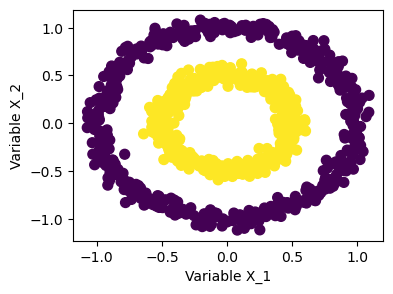

In [55]:
plt.rcParams["figure.figsize"] = (4,3)
X, y = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="viridis")
plt.xlabel('Variable X_1')
plt.ylabel("Variable X_2")
plt.show()

In [56]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10).fit(X)
predicted_db = dbscan.fit_predict(X)
sm.confusion_matrix(y, predicted_db)

array([[500,   0],
       [  0, 500]], dtype=int64)

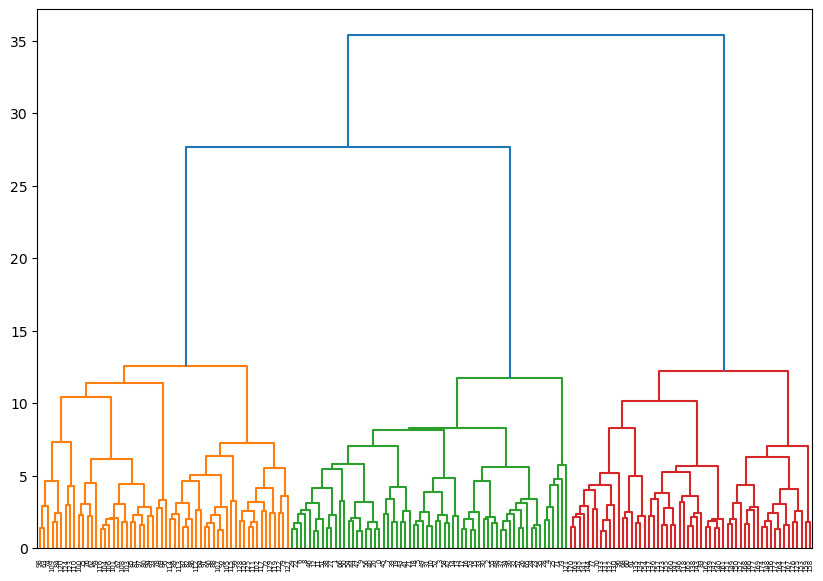

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(wine_std, "ward")
plt.figure(figsize=(10,7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()